### Imports

In [1]:
import csv
import re
import glob
import datetime
from pathlib import Path
import pandas
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append(str(Path.cwd().parents[0]))
from functions import *

### Set Save File Name

In [2]:
save_path = Path.cwd() / "Plots"
if not save_path.exists():
    save_path.mkdir()

### Get the Data Paths

In [30]:
# Get the lists of file paths
data_files = getFilePaths(Path.cwd(), "Select Files to Plot")

In [31]:
raw_dfs = readCSVFiles(data_files)
# remove the first two columns
raw_dfs = [df.iloc[:, 2:] for df in raw_dfs]
# convert all headers to srting
raw_dfs = [df.astype(str) for df in raw_dfs]
raw_dfs[0].head()

,ep_max_height,ep_spring_k,ep_zeta,rollout/ep_len_mean,rollout/ep_rew_mean,time/fps,train/approx_kl,train/clip_fraction,train/clip_range,train/entropy_loss,...,time/fps.9,train/approx_kl.9,train/clip_fraction.9,train/clip_range.9,train/entropy_loss.9,train/explained_variance.9,train/learning_rate.9,train/loss.9,train/policy_gradient_loss.9,train/value_loss.9
0,value,value,value,value,value,value,value,value,value,value,...,value,value,value,value,value,value,value,value,value,value
1,0.10066301375627518,6955.03173828125,0.007504050619900227,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0.09372075647115707,10507.4638671875,0.0028595859184861183,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,0.09301894903182983,8901.2998046875,0.0158406849950552,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,0.09912504255771637,6720.69140625,0.01302340254187584,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


### Clean Data Frames

In [32]:
# Append the first row of the dataframe to the header
plot_dfs = []
for df in raw_dfs:
    df.columns = df.iloc[0] + "_" + df.columns  
    df = df.iloc[1:]
    plot_dfs.append(df)
    
plot_dfs[0].head()

,value_ep_max_height,value_ep_spring_k,value_ep_zeta,value_rollout/ep_len_mean,value_rollout/ep_rew_mean,value_time/fps,value_train/approx_kl,value_train/clip_fraction,value_train/clip_range,value_train/entropy_loss,...,value_time/fps.9,value_train/approx_kl.9,value_train/clip_fraction.9,value_train/clip_range.9,value_train/entropy_loss.9,value_train/explained_variance.9,value_train/learning_rate.9,value_train/loss.9,value_train/policy_gradient_loss.9,value_train/value_loss.9
1,0.10066301375627518,6955.03173828125,0.007504050619900227,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0.09372075647115707,10507.4638671875,0.0028595859184861183,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,0.09301894903182983,8901.2998046875,0.0158406849950552,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,0.09912504255771637,6720.69140625,0.01302340254187584,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,0.07788979262113571,1608.756103515625,0.014443743973970413,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [41]:
plot_type = "height"
# Get the series from the column names
if plot_type == "rew":
    data_values = ["value_rollout/ep_rew_mean"]
elif plot_type == "spring":
    data_values = ["value_ep_spring_k"]
elif plot_type == "zeta":
    data_values = ["value_ep_zeta"]
elif plot_type == "height":
    data_values = ["value_ep_max_height"]
elif plot_type == "save_data":
    data_values = ["value_ep_spring_k", "value_ep_zeta"]

final_dfs = []
for df in plot_dfs:
    drop_names = []
    for column in df:
        if not any(data_values in column for data_values in data_values):
            drop_names.append(str(column))
    df = df.drop(drop_names, axis=1)
    # convert to float
    df = df.astype(float)
    final_dfs.append(df)

final_dfs[0]

,value_ep_max_height,value_ep_max_height.1,value_ep_max_height.2,value_ep_max_height.3,value_ep_max_height.4,value_ep_max_height.5,value_ep_max_height.6,value_ep_max_height.7,value_ep_max_height.8,value_ep_max_height.9
1,0.100663,0.090307,0.097710,0.100058,0.103117,0.098732,0.096645,0.102242,0.101707,0.097641
2,0.093721,0.098432,0.095396,0.105723,0.113164,0.061242,0.093417,0.100331,0.100717,0.092829
3,0.093019,0.095808,0.095914,0.098591,0.099438,0.093598,0.100483,0.094436,0.096832,0.075505
4,0.099125,0.111067,0.095183,0.076613,0.108231,0.098380,0.095106,0.075929,0.087783,0.102050
5,0.077890,0.096939,0.094142,0.092997,0.063044,0.092921,0.091594,0.076074,0.108044,0.114376
...,...,...,...,...,...,...,...,...,...,...
997,0.114798,0.115811,0.115775,0.113458,0.113802,0.115139,0.114387,0.113507,0.112701,0.114833
998,0.114798,0.115811,0.115775,0.113458,0.113802,0.115139,0.114387,0.113507,0.112701,0.114833
999,0.114798,0.115811,0.115775,0.113458,0.113802,0.115139,0.114387,0.113507,0.112701,0.114833
1000,0.114798,0.115811,0.115775,0.113458,0.113802,0.115139,0.114387,0.113507,0.112701,0.114833


### Save the Final Values to File

In [7]:
# loop through the dataframes and save the final designs to a csv file
for df in range(len(final_dfs)):
    # create a list of the last non nan values for each column
    values = [[], []]
    ii = 0
    for column in final_dfs[df]:
        index = final_dfs[df][column].last_valid_index()
        if ii % 2 == 0:
            values[0].append(final_dfs[df][column][index])
        else:
            values[1].append(final_dfs[df][column][index])
        ii += 1
    
    # Save the values to csv files
    save_vals = np.array(values).transpose()
    header = "SpringK, Zeta"
    np.savetxt(save_path / f"final_designs{df}.csv", save_vals, delimiter=",", header=header, comments="")

### Plot Average/STD Timeseries

In [42]:
# remove nan values from the dataframes
for ii in range(len(final_dfs)):
    # remove rows with nan values
    temp_df = final_dfs[ii]
    temp_df = temp_df.dropna()
    final_dfs[ii] = temp_df


X_MEAN, Y_MEAN, Y_STD = [], [], []

for ii in range(len(final_dfs)):
    X_MEAN.append(final_dfs[ii].index)
    y_m, y_s = dfAverageStd(final_dfs[ii])
    Y_MEAN.append(y_m)
    Y_STD.append(y_s)

### Plot Dual Y Axis

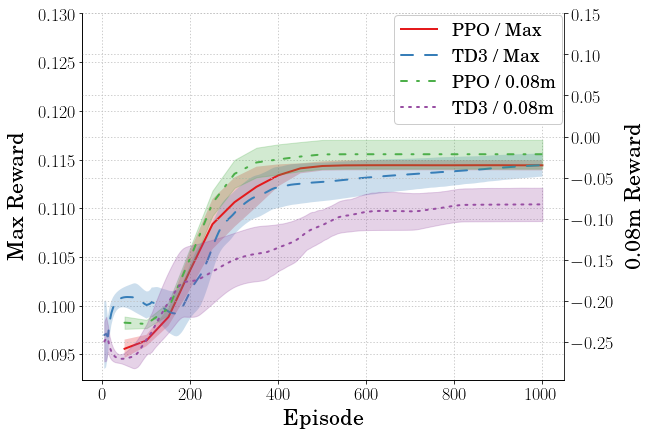

In [26]:
fig = plt.figure(figsize=(9,6))
ax1 = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax1.get_ymajorticklabels(),fontsize=18)
plt.setp(ax1.get_xmajorticklabels(),fontsize=18)

# Remove the top and right border, they are not needed
ax1.spines['right'].set_visible(True)
ax1.spines['right'].set_color("black")
# ax1.spines['top'].set_color('none')

# Define the positions of the axes tick marks
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

# Manually set the x-axis limits, if necessary
# plt.xlim(0,5)

# Turn on the plot grid and set appropriate linestyle and color
ax1.grid(True, linestyle=':', color='0.75')
ax1.set_axisbelow(True)

# Define the X and Y1 axis labels
ax1.set_xlabel('Episode', fontsize=22, weight='bold', labelpad=5)
ax1.set_ylabel('Max Reward', fontsize=22, weight='bold', labelpad=10)

# Plots gain used on input to tracking of Surge
ax1.plot(X_MEAN[0], Y_MEAN[0], linewidth=2, linestyle='-', label="PPO / Max")
ax1.fill_between(X_MEAN[0], Y_MEAN[0]-(Y_STD[0]/2), Y_MEAN[0]+(Y_STD[0])/2, alpha=0.25)
ax1.plot(X_MEAN[2], Y_MEAN[2], linewidth=2, linestyle='--', label="TD3 / Max")
ax1.fill_between(X_MEAN[2], Y_MEAN[2]-(Y_STD[2]/2), Y_MEAN[2]+(Y_STD[2])/2, alpha=0.25)

# Manually set the y1-axes limits, if necessary
ax1.set_ylim(bottom=None, top=0.13)

# Set x-axis tick marks
# label = ["0", "150k", "300k", "450k", "600k", "750k"]
# ax1.set_xticks(np.linspace(0, x_ax_len, 6))
# ax1.set_xticklabels(label, fontsize=18, weight='bold')

# Set up the 2nd Y-axis, using the same x-axis as the first
ax2 = ax1.twinx()

# Remove the top border, it's not needed
# ax2.spines['top'].set_color('none')

# Turn on the plot grid and set appropriate linestyle and color
ax2.grid(True, linestyle=':', color='0.75')
ax2.set_axisbelow(True) 

# Change the y2 axis units font
plt.setp(ax2.get_ymajorticklabels(), fontsize=18)

# Define the Y2 axis labels
ax2.set_ylabel('0.08m Reward', fontsize=22, weight='bold', labelpad=10)

ax2.plot(X_MEAN[1], Y_MEAN[1], linewidth=2, linestyle='-.', label="PPO / 0.08m", color="#4daf4a")
ax2.fill_between(X_MEAN[1], Y_MEAN[1]-(Y_STD[1]/2), Y_MEAN[1]+(Y_STD[1])/2, alpha=0.25, color="#4daf4a")
ax2.plot(X_MEAN[3], Y_MEAN[3], linewidth=2, linestyle=':', label="TD3 / 0.08m", color="#984ea3")
ax2.fill_between(X_MEAN[3], Y_MEAN[3]-(Y_STD[3]/2), Y_MEAN[3]+(Y_STD[3])/2, alpha=0.25, color="#984ea3")

# Manually set the y2-axes limits, if necessary
ax2.set_ylim(bottom=None, top=0.15)

# Create the legend, then fix the fontsize
# ask matplotlib for the plotted objects and their labels
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
leg = ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
ident = "comp"
filename = f'avg_{plot_type}_{ident}.svg'
path = save_path / filename
plt.savefig(path, transparent=True)
filename = f'avg_{plot_type}_{ident}.png'
path = save_path / filename
plt.savefig(path, transparent=True)
plt.show()

### Plot Learning Data

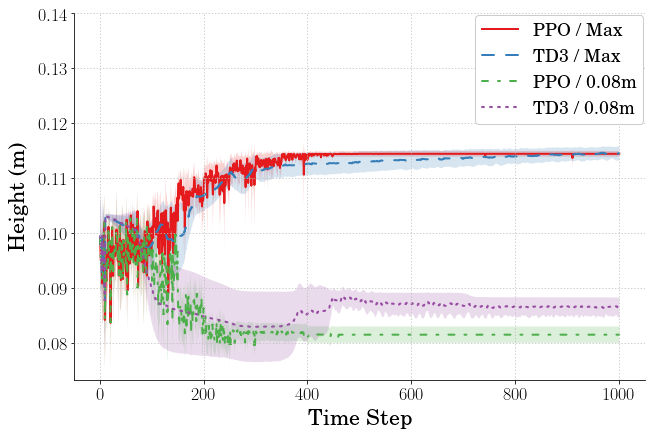

In [46]:
# Set the plot size - 3x2 aspect ratio is best
# fig = plt.figure(figsize=(6,4))
fig = plt.figure(figsize=(9,6))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time Step', fontsize=22, weight='bold', labelpad=5)

if plot_type == "rew":
    plt.ylabel(r'Reward', fontsize=22, weight='bold', labelpad=10)
elif plot_type == "spring":
    plt.ylabel(r'Spring Constant $\alpha$', fontsize=22, weight='bold', labelpad=10)
elif plot_type == "zeta":
    plt.ylabel(r'Damping Ratio $\zeta$', fontsize=22, weight='bold', labelpad=10)
elif plot_type == "height":
    plt.ylabel(r"Height (m)", fontsize=22, weight='bold', labelpad=10)

lstyles = ['-', '--', '-.', ':']
lrs = ["PPO / Max", "TD3 / Max", "PPO / 0.08m", "TD3 / 0.08m"]
for ii in range(len(final_dfs)):
    plt.plot(X_MEAN[ii], Y_MEAN[ii], linewidth=2, linestyle=lstyles[ii], label=f"{lrs[ii]}")
    plt.fill_between(X_MEAN[ii], Y_MEAN[ii]-Y_STD[ii]/2, Y_MEAN[ii]+Y_STD[ii]/2, alpha=0.2)
        
# uncomment below and set limits if needed
# plt.ylim(bottom=None, top=0.03)
plt.ylim(bottom=None, top=0.14)
# plt.ylim(bottom=3000, top=12000)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
ident = "comp"
filename = save_path / f'avg_{plot_type}_{ident}.svg'
plt.savefig(filename, transparent=True)
filename = save_path / f'avg_{plot_type}_{ident}.png'
plt.savefig(filename, transparent=True)
plt.show()